![title](../images/logo_nao_digital.png)

# Tema 1: Elementos de Procesamiento de Lenguaje Natural
## 1. Objetivo

Familiarizarse con los conceptos de Deep Learning para plantear un modelo que permita crear un ChatBot de conversación en texto.

## Datos de la Medium Amira Rashid

Cómo se ha mencionado en el Anexo A, se ha provisto el archivo `conversations.json` que contiene los scripts de interacciones de usuarios y las respuestas que se espera que reciban, mismos que han sido provistos por el equipo de Amira a la empresa ChatBot Intelligence. 

Esencialmente se trata de una estructura que contiene una serie de scripts de conversación:
* **tag:** es una etiqueta que clasifica el tipo de interacción entre el usuario y el Chatbot (por ejemplo, “saludo”, “despedida”, etcétera),
* **patterns:** conversaciones de ejemplo que se espera recibir como consultar al chatbot por parte de los usuarios,
* **responses:** es una lista de las respuestas en texto que se espera que los usuarios reciban.




Este documento se desarrollarán scripts en Python que permitan plantear un primer modelo predictivo en el framework de Deep Learning para generar un ChatBot de conversación.

## 2. Librerias de trabajo

In [23]:
# Instala libreria Pandas si no la tenemos
#!pip install numpy tensorflow pandas matplotlib seaborn wordcloud scikit-learn

**Instalación de Spacy**

Spacy provee en su documentación las instrucciones para instalar su librería: https://spacy.io/usage

In [24]:
#pip install -U pip setuptools wheel
#pip install -U spacy
#python -m spacy download en_core_web_sm
#python -m spacy download es_core_news_sm

In [25]:
import os
import numpy as np
import spacy
import pandas as pd
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

## 3. Elementos de Procesamiento de Lenguaje Natural

El procesamiento de lenguaje natural (NLP, por sus siglas en inglés) es una rama de la inteligencia artificial que se enfoca en hacer que las computadoras entiendan y generen lenguaje humano de manera efectiva. En otras palabras, se trata de enseñar a las computadoras a "entender" el lenguaje humano, en sus expresiones habladas y escritas.

En la actualidad, muchas aplicaciones tecnológicas emplean algoritmos y técnicas de NLP para facilitarnos tareas:

* **Traducción automática:** se refiere a sistemas de traducción automática que analizar el texto en un idioma y generar una traducción en otro idioma, por ejemplo en películas o aplicaciones de videollamadas como Zoom.
* **Extracción de información:** utilizado para extraer información de textos, como nombres, fechas y lugares.
* **Resumen automático:** algunos procesadores de texto pueden resumir automáticamente textos largos en un resumen más corto y fácil de entender.
* **Clasificación de textos:** cuando se tienen colecciones grandes de documentos, estos se pueden catalogar con técnicas de NLP en diferentes categorías, como noticias, spam y mensajes de redes sociales.
* **Corrección ortográfica y gramatical:** se refiere a la corrección de errores de ortografía y gramática en textos, en procesadores de texto, correo electrónico o mensajería.
* **Chatbots y asistentes virtuales:** los chatbots y asistentes virtuales (como Siri o Alexa) utilizan NLP para entender las preguntas y solicitudes de los usuarios y proporcionar respuestas adecuadas.
* **ChatGPT:** es un modelo de lenguaje capaz de respuestas a partir de una entrada de texto, lo que lo convierte en un modelo de lenguaje conversacional, que ha popularizado en fechas recientes, desarrollado por la empresa OpenIA.

Centrándonos específicamente en los chatbots de conversación por texto, estos sistemas requieren de técnicas para interpretar las preguntas que les hacen las personas y generar respuestas; su uso se ha popularizado como asistentes disponibles para proveer información general a cliuentes, como actualizaciones de estatus de pedidos.

En esta sección se abordarán elementos básicos para la construcción de un Chatbot, por lo que se centrará específicamente en el lenguaje escrito.

### 3.1 Conceptos Generales

En el procesamiento de lenguaje natural centrado en texto, se analizan unidades básicas del lenguaje escrito. En términos muy generales, en los lenguajes humanos existe una correspondencia entre sonidos y símbolos escritos que se asociando a una idea o concepto.

Claramente cuando intentamos realizar un análisis de lenguaje, podemos partir del analizar tales unidades a nivel granular (por ejemplo en fonemas o grafemas), pero usualmente se suelen estudiar los mensajes como textos individuales (**documentos**, como se conocen en el argot de NLP).

En este sentido, se llama **corpus** a una colección de textos (o habla) del lenguaje que nos interesa, y **vocabulario** como una colección de palabras que ocurren en el corpus (o más general, en el lenguaje).

### 3.2 Normalización de Texto (Tokenización)

Una forma común de estudiar una colección de documentos es a través de su división en **tokens**, los cuales no son más que secuencias de caracteres consecutivos que representan una unidad semántica. Los tokens se utilizan para dividir el texto en unidades significativas, como palabras, frases, signos de puntuación, números, conjuntos de letras y otros

Al proceso que permite dividir el texto en tokens individuales para facilitar su análisis posterior se le denomina como **tokenización o normalización de texto**. El objetivo de la tokenización es transformar el texto en una lista de tokens, lo que hace que sea más fácil para el ordenador procesar y analizar a los elementos de un texto. Por ejemplo, en la frase "Hola, ¿cómo estás?", la tokenización podría producir una lista de tokens como "Hola", ",", "¿", "cómo", "estás", "?".

En Python, existen dos librerias principales que nos permiten realizar NLP, a saber, NLTK (https://www.nltk.org) y spaCy (https://spacy.io). En este notebook se usará la segunda.

Volviendo al tema, en spaCy, se pueden precargar un modelo de texto en español y calcular la tokenización de un texto (documento) de manera muy sencilla:

**Carga modelo de spaCy:**

In [27]:
# Cargamos el modelo de lenguaje en español de Spacy
nlp = spacy.load('es_core_news_sm')

In [28]:
# Creamos una variable de texto
news = "Los corredores fueron presurosos, hacia la meta, en aquella tarde soleada de 1985 en el estadio donde se llevaba acabo la maratón!"
# calculamos la tokenizacion
new_tokens = nlp(news)

# Imprime el token y un indice que lo numera:
for i,token in enumerate(new_tokens):
    print(i, token)

0 Los
1 corredores
2 fueron
3 presurosos
4 ,
5 hacia
6 la
7 meta
8 ,
9 en
10 aquella
11 tarde
12 soleada
13 de
14 1985
15 en
16 el
17 estadio
18 donde
19 se
20 llevaba
21 acabo
22 la
23 maratón
24 !


### 3.3 Lematización

Por otro lado, también existe un proceso llamado **lematización** que consiste en reducir una palabra a su forma base o "lema". El lema es la forma canónica de una palabra que se encuentra en un diccionario, y es el término utilizado para representar el significado fundamental de la palabra, por ejemplo, el lema de las palabras "corriendo", "corre", y "corrió" es "correr".

Podemos pensar en la lematización como un forma de reducción de una palabra utilizando su estructura morfológica y en tal sentido es útil pues 
intenta reducir la complejidad del vocabulario, lo que hace que el análisis de texto más sencillo.

In [29]:
# Imprime el token y un indice que lo numera:
for i,token in enumerate(new_tokens):
    # Nota: se accede con el método .lemma_
    print(i, token.lemma_)

0 el
1 corredor
2 ser
3 presuroso
4 ,
5 hacia
6 el
7 meta
8 ,
9 en
10 aquel
11 tarde
12 soleado
13 de
14 1985
15 en
16 el
17 estadio
18 donde
19 él
20 llevar
21 acabo
22 el
23 maratón
24 !


Si realizamos la comparación con el resultado que obtuvimos al tokenizar, veremos que algunas palabras se representan de forma distinta:

In [30]:
pd.DataFrame(
    {'tokens': [x for x in new_tokens],
     'lemmas': [x.lemma_ for x in new_tokens]
     })

,tokens,lemmas
0,Los,el
1,corredores,corredor
2,fueron,ser
3,presurosos,presuroso
4,",",","
5,hacia,hacia
6,la,el
7,meta,meta
8,",",","
9,en,en


### 3.4 Consideraciones sobre limpieza de texto y "stop words"

Hasta aquí hemos visto algunas técnicas para dividir texto y representando sus componentes a través de su estructura morfológica, sin embargo también es necesario destacar que los textos se acompañan de otros símbolos que pueden o no ser relevantes para el análisis y por lo tanto hay que tomar decisiones de si es necesario incluirlos o bien procesarlos o limpiarlos de los textos, esto significa que tenemos que decidir si:

* Los signos de puntuacion, admiración, números y otros caracteres especiales (por ejemplo arrobas, guiones medios o bajos) deben considerarse como palabras o no,
* Consideramos como unidades separados o no a palabras que están escritas en mayúsculas o minúsculas (por ejemplo, "HOLA" y "hola", que en contextos de spam o comentarios tóxicos de redes sociales tienden a aparecer)
* Debemos interpretar como palabras distintas a palabras que:
  * Están mal escritas de acuerdo a las reglas gramaticales del lenguaje (e.g. "olaaa k aze" y "hola, ¿qué haces?")
* Si es válido o no estudiar un texto únicamente con reducciones de una palabra (esto por ejemplo, puede hacer que no distingamos si una palabra está escrita en masculino o femenino, "roja" o "rojo"),
* Si es trascendente quitar acentos o no,
  
Particularmente, es relevante decidir si dentro del análisis se deben involucrar a las **stop words**, que no son más palabras comunes pero no tienen un significado distintivo en la mayoría de los contextos en los que se usan, por lo que a menudo se eliminan durante el procesamiento de texto para reducir el ruido y mejorar la eficiencia en la búsqueda de información relevante.

Ejemplos de stop words en español son artículos ("el", "la", "los", "las", "un", "una", "unos", "unas"), pronombres personales ("yo", "tú", "él", "ella", "usted", "nosotros", "vosotros", "ellos", "ellas", "ustedes"), preposiciones ("a", "ante", "bajo", "con", "de", "desde", "en", "entre", "hacia", "hasta", "para", "por", "según", "sin", "sobre", "tras"), conjunciones ("y", "e", "ni", "o", "u", "pero", "mas", "sino", "que", "porque", "pues", "ya que", "aunque".) y/o adverbios ("muy", "más", "menos", "así", "ahora", "aquí", "allí", "cuando", "como", "donde", "por qué", "para qué", "cómo", "cuánto").

Es importante destacar que el conjunto de stop words puede variar según el idioma y el contexto específico de la aplicación del procesamiento de lenguaje natural.

Nuevamente, spaCy facilita estos procesamientos:

**Elimina puntuaciones:**

In [31]:
# Tokens sin signos de puntuación
tokens_palabras = [t.orth_ for t in new_tokens if not t.is_punct] 

for token in tokens_palabras:
    print(token)

Los
corredores
fueron
presurosos
hacia
la
meta
en
aquella
tarde
soleada
de
1985
en
el
estadio
donde
se
llevaba
acabo
la
maratón


**Elimina stop words**

In [32]:
# Tokens sin stopwords
tokens_lexicos = [t.orth_ for t in new_tokens if not t.is_stop]

for token in tokens_lexicos:
    print(token)

corredores
presurosos
,
meta
,
soleada
1985
estadio
llevaba
acabo
maratón
!


**Elimina puntuacion y stop words:**

In [33]:
# Tokens sin puntuación ni stopwords
tokens_lexicos_not_stop = [t.orth_ for t in new_tokens if not t.is_stop | t.is_punct] 

for token in tokens_lexicos_not_stop:
    print(token)

corredores
presurosos
meta
soleada
1985
estadio
llevaba
acabo
maratón


# 4. Representaciones gráficas

Cuando se analizan documentos muchas veces es de interés realizar un análisis exploratorio de los términos involucrados en el texto. La forma más sencilla es a través del análisis de frecuencias de los mismos.

## 4.1 Gráficos de frecuencias

Por ejemplo, podemos analizar conteos de las palabras que ha provisto el equipo de Amira para sus vaticinios zodiacales. Para ello, se debe manipular el archivo con scripts de conversaciones que han proporcionado `conversations.json`

**Abriendo datos de conversaciones**

Usando la libreria `json` podemos abrir el mencionado archivo:


In [34]:
with open('../data/conversations.json') as f:
    conversations = json.load(f)


Ahora podemos examinar el contenido del archivo, que como sabemos tiene un campo que etiqueta el tipo de convesación (`tag`), así como ejemplos de los mensajes que le podrían hacer llegar los usuarios (`patterns`) y de las respuestas que el bot podría contestarles (`responses`):

In [35]:
conversations

[{'tag': 'saludo',
  'patterns': ['Hola', 'holaa', 'oliiii', 'hello', 'hi', 'buenos dias'],
  'responses': ['Hola!!', 'Hola caracola!! que bueno verte', 'Hola ;)']},
 {'tag': 'introduction',
  'patterns': ['como te llamas',
   'cual es tu nombre',
   'quien eres',
   'quien eres tu'],
  'responses': ['Mi nombre es Amira ChatBot, soy un bot de conversación de la Medium Amira',
   'Soy Amira ChatBot, soy un bot de conversación! Te ayudare a conocer el futuro',
   'Me llamo Amira ChatBot, soy un bot entrenandose para conversar']},
 {'tag': 'adios',
  'patterns': ['Adios', 'bye', 'ciao', 'nos vemos'],
  'responses': ['Adios! :) vuelve pronto a visitarnos',
   'Bye, Bye, que el universo este contigo.',
   'Vuelve pronto, te mando un abrazo.']},
 {'tag': 'gracias',
  'patterns': ['Gracias', 'Te agradezco', 'Fue un placer'],
  'responses': ['De nada, fue un placer',
   'No hay nada que agradecer, cuando quieras!']},
 {'tag': 'aries',
  'patterns': ['mi signo es aries', 'aries', 'soy aries', '

**Procesando las respuestas a los usuarios**

Ahora se pueden extraer en un lista las diferentes respuestas a los usuarios que plantea el equipo de Amira:

In [36]:
horoscopos = []

for script in conversations:

    message = script['responses']
    horoscopos.append(message)

In [37]:
horoscopos

[['Hola!!', 'Hola caracola!! que bueno verte', 'Hola ;)'],
 ['Mi nombre es Amira ChatBot, soy un bot de conversación de la Medium Amira',
  'Soy Amira ChatBot, soy un bot de conversación! Te ayudare a conocer el futuro',
  'Me llamo Amira ChatBot, soy un bot entrenandose para conversar'],
 ['Adios! :) vuelve pronto a visitarnos',
  'Bye, Bye, que el universo este contigo.',
  'Vuelve pronto, te mando un abrazo.'],
 ['De nada, fue un placer', 'No hay nada que agradecer, cuando quieras!'],
 ['Amor: Este es un buen momento para que los solteros se abran a nuevas oportunidades románticas. Si ya tienes pareja, es posible que surjan algunos desafíos, pero trata de comunicarte con claridad y respeto para resolver cualquier problema. Tu compatibilidad astral es alta con los signos de fuego, como Leo y Sagitario.',
  'Salud: Es importante que te centres en cuidar tu salud mental. Trata de hacer actividades que te ayuden a reducir el estrés, como la meditación, el yoga o simplemente pasar tiempo

Lo anterior generó una lista de listas con los mensajes que nos interesan. Para unificar los mensajes en una sola lista se puede usar la utilidad `itertools.chain.from_iterable`:

In [38]:
import itertools
documents = list(itertools.chain.from_iterable(horoscopos))

Ahora veamos el resultado:

In [39]:
documents[:15]

['Hola!!',
 'Hola caracola!! que bueno verte',
 'Hola ;)',
 'Mi nombre es Amira ChatBot, soy un bot de conversación de la Medium Amira',
 'Soy Amira ChatBot, soy un bot de conversación! Te ayudare a conocer el futuro',
 'Me llamo Amira ChatBot, soy un bot entrenandose para conversar',
 'Adios! :) vuelve pronto a visitarnos',
 'Bye, Bye, que el universo este contigo.',
 'Vuelve pronto, te mando un abrazo.',
 'De nada, fue un placer',
 'No hay nada que agradecer, cuando quieras!',
 'Amor: Este es un buen momento para que los solteros se abran a nuevas oportunidades románticas. Si ya tienes pareja, es posible que surjan algunos desafíos, pero trata de comunicarte con claridad y respeto para resolver cualquier problema. Tu compatibilidad astral es alta con los signos de fuego, como Leo y Sagitario.',
 'Salud: Es importante que te centres en cuidar tu salud mental. Trata de hacer actividades que te ayuden a reducir el estrés, como la meditación, el yoga o simplemente pasar tiempo en la natu

En el texto se puede notar que el texto de los mensajes tiene stops words y signos de puntuacion; estos se pueden limpiarr con spaCy, convirtiendo a letras minusculas

In [40]:
# Genera la version de los documentos en tokens
horoscopos_tokens  = []

for doc in documents:

    doc_tokens = nlp(doc)
    new_doc_tokes = [t.orth_.lower() for t in doc_tokens if not t.is_stop | t.is_punct]
    horoscopos_tokens.append(new_doc_tokes)

# crea una lista con terminos limpios
horoscopos_tokens_clean = list(
    itertools.chain.from_iterable(horoscopos_tokens)
    )

In [41]:
horoscopos_tokens_clean[:20]

['hola',
 'hola',
 'caracola',
 'verte',
 'hola',
 'nombre',
 'amira',
 'chatbot',
 'bot',
 'conversación',
 'medium',
 'amira',
 'amira',
 'chatbot',
 'bot',
 'conversación',
 'ayudare',
 'futuro',
 'llamo',
 'amira']

Ahora podemos contar las palabras:

In [42]:
# Crea un diccionario para guardar conteos
word_count={}

# cuenta palabras añadiendolas a un diccionario
for palabra in horoscopos_tokens_clean:
    if palabra in word_count.keys():
        word_count[palabra] +=1
    else:
        word_count[palabra]=1

In [43]:
word_count

{'hola': 3,
 'caracola': 1,
 'verte': 1,
 'nombre': 3,
 'amira': 6,
 'chatbot': 3,
 'bot': 3,
 'conversación': 2,
 'medium': 3,
 'ayudare': 1,
 'futuro': 1,
 'llamo': 1,
 'entrenandose': 1,
 'conversar': 1,
 'adios': 1,
 'vuelve': 2,
 'visitarnos': 1,
 'bye': 2,
 'universo': 2,
 'mando': 1,
 'abrazo': 1,
 'placer': 1,
 'agradecer': 1,
 'quieras': 1,
 'amor': 20,
 'momento': 30,
 'solteros': 6,
 'abran': 1,
 'oportunidades': 7,
 'románticas': 3,
 'tienes': 6,
 'pareja': 16,
 'surjan': 1,
 'desafíos': 5,
 'comunicarte': 2,
 'claridad': 1,
 'respeto': 1,
 'resolver': 4,
 'problema': 5,
 'compatibilidad': 1,
 'astral': 1,
 'alta': 1,
 'signos': 1,
 'fuego': 1,
 'leo': 4,
 'sagitario': 5,
 'salud': 27,
 'importante': 20,
 'centres': 3,
 'cuidar': 6,
 'mental': 9,
 'actividades': 1,
 'ayuden': 1,
 'reducir': 4,
 'estrés': 8,
 'meditación': 6,
 'yoga': 6,
 'simplemente': 1,
 'pasar': 2,
 'tiempo': 10,
 'naturaleza': 4,
 'idea': 2,
 'hagas': 3,
 'chequeo': 1,
 'médico': 2,
 'asegurarte': 2,
 '

Con dicha información ahora se puede crear una table en pandas con la información de conteos de palabras:

In [44]:
df = pd.DataFrame(
    {'palabra': word_count.keys(),
     'frecuencia': word_count.values()}
     )

df.sort_values(['frecuencia'],ascending=False, inplace=True)

In [45]:
df.head(20)

,palabra,frecuencia
81,color,44
67,trabajo,34
25,momento,30
46,salud,27
82,suerte,25
92,año,23
68,estás,22
47,importante,20
24,amor,20
31,pareja,16


Esta misma tabla nos sirve para crear un gráfico de frecuencias de los términos involucrados:

[Text(0.5, 1.0, 'Figura 1: Conteos de frecuencias de palabras en respuestas de Amira')]

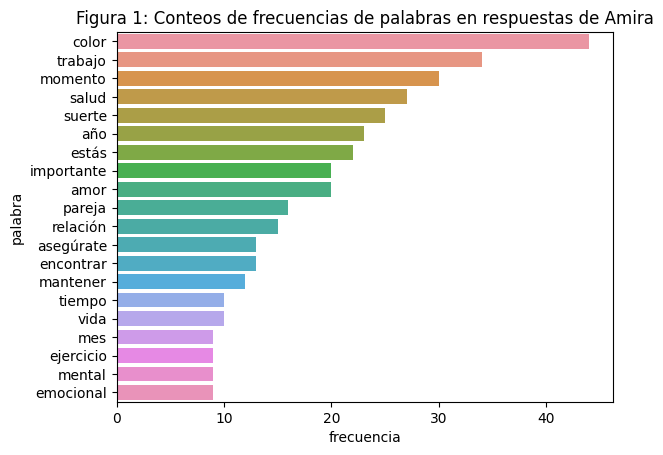

In [46]:
sns.barplot(
    data=df.head(20),
    y="palabra",
    x="frecuencia"
    ).set(title='Figura 1: Conteos de frecuencias de palabras en respuestas de Amira')

**Preguntas:**

* ¿Cuales son las palabras más populares?
* ¿Hay temas de los que se habla repetidamente?, De ser el caso, ¿cuáles son esos temas?

## 4.2 Nubes de palabras

Una nube de palabras (también conocida como "word cloud" en inglés) es una representación visual de las palabras más frecuentes en un texto o corpus de texto. En el procesamiento del lenguaje natural tales herramientas se utilizan para visualizar y analizar los patrones y las tendencias en grandes conjuntos de datos de texto.

La nube de palabras muestra las palabras más comunes en un texto, con las palabras más frecuentes mostradas en un tamaño de fuente más grande y las menos frecuentes en un tamaño de fuente más pequeño. 

Las nubes de palabras son útiles para identificar temas principales en un texto, patrones de lenguaje y conceptos clave. También pueden ser utilizadas para visualizar los resultados de una encuesta o las opiniones de los usuarios sobre un producto o servicio en línea, por ejemplo.

En Python, se pueden crear nubes de palabas con la librería `WordCloud`. Una forma sencilla es crear la nube con los conteos de frecuencias de palabras que consolidamos previamente:

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Figura 2: Nube de palabras a partir de frecuencias')

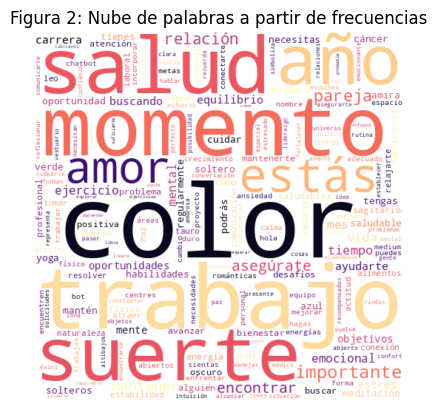

In [48]:
# Crea nube de palabras con el conteo de palabras
wc_freq = WordCloud(
    width = 500,
    height = 500,
    background_color = "white",
    colormap = "magma").generate_from_frequencies(word_count)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc_freq, interpolation = "bilinear")
plt.title("Figura 2: Nube de palabras a partir de frecuencias")

Por otro lado, también puede crear las nubes a través de una cadena de texto:

In [49]:
# une las palabras insertando un espacio entre ellas a partir
# de los terminos que limpiamos
" ".join(horoscopos_tokens_clean)

'hola hola caracola verte hola nombre amira chatbot bot conversación medium amira amira chatbot bot conversación ayudare futuro llamo amira chatbot bot entrenandose conversar adios vuelve visitarnos bye bye universo vuelve mando abrazo placer agradecer quieras amor momento solteros abran oportunidades románticas tienes pareja surjan desafíos comunicarte claridad respeto resolver problema compatibilidad astral alta signos fuego leo sagitario salud importante centres cuidar salud mental actividades ayuden reducir estrés meditación yoga simplemente pasar tiempo naturaleza idea hagas chequeo médico asegurarte orden trabajo estás momento crecimiento profesional estás buscando trabajo promoción momento empeño tienes trabajo estable zona confort demostrar valía mejorar habilidades color suerte color suerte mes rojo color ayudará atraer energía positiva necesitas lograr objetivos amor año tauro oportunidad fortalecer relación actual encontrar pareja soltero energías astrales beneficiarán amor 

Podemos crear la nube transmitiendo esta cadena de texto a `WordCloud`:

Text(0.5, 1.0, 'Figura 3: Nube de palabras a partir de texto')

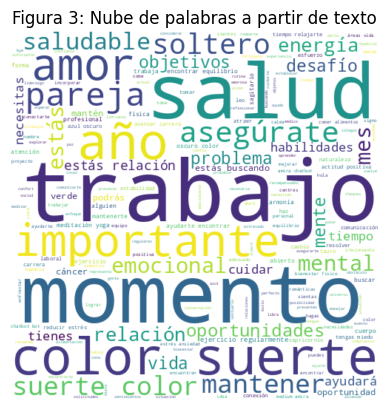

In [50]:
wc = WordCloud(
    width = 500,
    height = 500,
    background_color = "white"
    ).generate(" ".join(horoscopos_tokens_clean))

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.title("Figura 3: Nube de palabras a partir de texto")

**Preguna**

* ¿qué temas son notorios en las nubes de palabras anteriores?


# 5. Encajes de texto y Bolsas de Palabras

Cómo sabemos, los modelos de aprendizaje automático solo pueden recibir representaciones numéricas como datos de entrada. Entonces, es necesario realizar algún procesamiento al texto para involucrarlos en análisis de NLP.

Unas de las técnicas más populares en NLP son los encajes (**embedding**), los cuales consisten en representaciones de palabras como vectores numéricos en un espacio multidimensionales (de $\mathbb{R}^n$). Esencialmente, su idea consiste en una transformación que asocia a un texto con un vector con entradas numéricas.

De hecho, varios de los gigantes tecnológicos han publicado sus encajes, siendo **word2vec** presentado por Google y **fastText** desarrollado por Meta, en ambos casos las representaciones derivan de técnicas avanzadas (e.g. pesos calculados con Redes de Deep Learning) que se entrenan con grandes volúmenes de documentos y que tienen en cuenta la distribución de las palabras en un corpus de texto y las relaciones semánticas entre ellas, es decir, existe cierta relación entre la representación numérica de dos textos que son similares en significado.

Dentro de los encajes, existe un método sencillo denominada bolsa de palabras (o "bag of words" en inglés), la cual es una técnica de representación de texto que se utiliza para convertir un documento o corpus de texto en una matriz de frecuencia de palabras. En esta técnica, se toman todas las palabras de un texto y se cuentan las veces que aparecen, ignorando su orden o estructura gramatical.

La bolsa de palabras se utiliza a menudo como un paso inicial en el procesamiento de lenguaje natural antes de aplicar técnicas más avanzadas, como los embeddings o la modelización de temas.

**Ejemplo**

Si tenemos un conjunto de documentos:

* documento 1: "buenos dias Mexico"
* documento 2: "buenas noches"

En este caso, el conjunto de palabras lo forma el vector `("buenos", "dias", "noches", "México")` con lo que puede codificar a ambos documentos como:

* vector documento 1: `(1, 1, 0, 1)`
* * vector documento 2: `(1, 0, 1, 0)`

Donde los 1 y 0 denotas la posición en que aparece la palabra en el vector con el que representamos al vocabulario.


## 5.1 Bolsa de palabras con Sklearn

Skleanr permite crear una bolsa de palabras de manera sencilla con la utilidad `CountVectorizer`

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

Recordemos que tenemos un vector con todos los mensajes que va a contestar el bot de Amira:

In [65]:
documents[:10]

['Hola!!',
 'Hola caracola!! que bueno verte',
 'Hola ;)',
 'Mi nombre es Amira ChatBot, soy un bot de conversación de la Medium Amira',
 'Soy Amira ChatBot, soy un bot de conversación! Te ayudare a conocer el futuro',
 'Me llamo Amira ChatBot, soy un bot entrenandose para conversar',
 'Adios! :) vuelve pronto a visitarnos',
 'Bye, Bye, que el universo este contigo.',
 'Vuelve pronto, te mando un abrazo.',
 'De nada, fue un placer']

Para construir la bolsa de palabras usaremos `CountVectorizer`:

In [66]:
# instancia el transformador
vectorizer = CountVectorizer()

# crea la bolsa de palabras con la lista de documentos
X = vectorizer.fit_transform(documents)

In [67]:
bow = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
    )


In [68]:
bow

,abiert,abierta,abierto,abiertos,abran,abrazo,abrumado,actitud,actividades,actual,...,vistiendo,vuelve,ya,yoga,zodiacal,zona,ámbito,áreas,éxito,útiles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Por ejemplo, el siguiente es la representación del mensaje: `Vuelve pronto, te mando un abrazo.`

In [72]:
bow.query("abrazo == 1")

,abiert,abierta,abierto,abiertos,abran,abrazo,abrumado,actitud,actividades,actual,...,vistiendo,vuelve,ya,yoga,zodiacal,zona,ámbito,áreas,éxito,útiles
8,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 6. Entregables

A. Crea un script en Python (`amira_text_processing.py`) que procese los datos del archivo **conversations.json** para generar:
    A.1. Una lista llamada `vocabulario` con los resultados tokenizados y lematizados de las mensajes de entrada propuestas por el equipo de Amira, es decir, los textos de la clave`"patterns"`.
    A.2. Una lista llamada `tags` con los resultados de las etiquetas propuesta por el equipo de Amira, es decir, los textos de la clave`"tag"`.
    
En todos los casos estos resultados deberán 1) ordenarse por orden alfabético, 2) usar letras en minúsculas, 3) eliminar signos de puntuación, así como los caracteres de interrogación y exclamación, 4) no tener elementos duplicados.

B. El script anterior, deberá tener como outputs a dos archivos en formato pickle (`vocabulario.pkl` y `tags.pkl`, respectivamente). Esto se puede lograr con el código:

```
import pickle

# lista de vocabulario ya procesado
vocabulario = ...

# crea un objecto pickle del vocabulario limpio
pickle.dump(
    vocabulario,
    open('vocabulario.pkl', 'wb')
    )

# Este objeto se puede leer posteriormente como:
vocabulario = pickle.load(
    open('vocabulario.pkl', 'rb')
    )

```

C. En el mismo script, crea la bolsa de palabras de ejemplos de los mensajes que le podrían hacer llegar los usuarios (es decir el campo `patterns` dentro del archivo `conversations.json`). Como resultado de dicho proceso, se deberá crear una tabla en formato .csv que salve la bolsa de palabras de todos los mensajes con el nombre `bow_amira_patterns.csv`